In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('D:/DataSets for ML/placement_linear.csv')

In [24]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [25]:
df.shape

(200, 2)

Text(0, 0.5, '0      3.26\n1      1.98\n2      3.25\n3      3.67\n4      3.57\n       ... \n195    2.46\n196    2.57\n197    3.24\n198    3.96\n199    2.33\nName: package, Length: 200, dtype: float64')

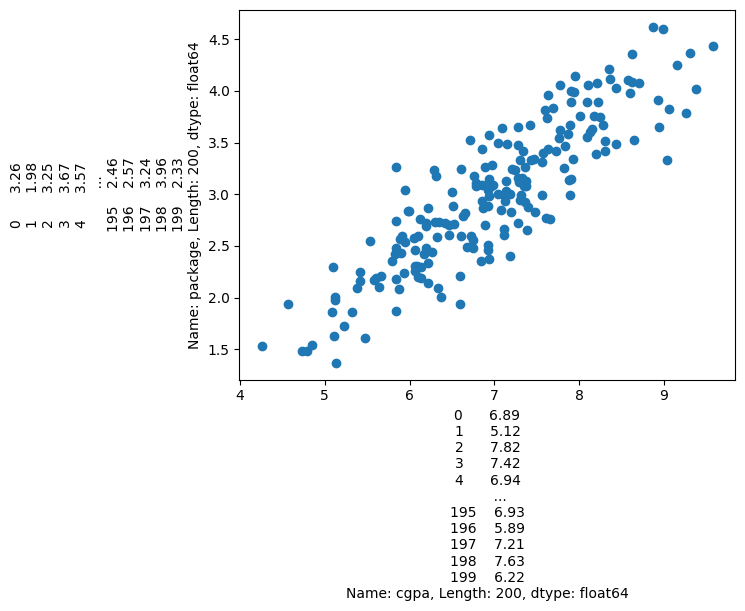

In [26]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel(df['cgpa'])
plt.ylabel(df['package'])

In [27]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [28]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

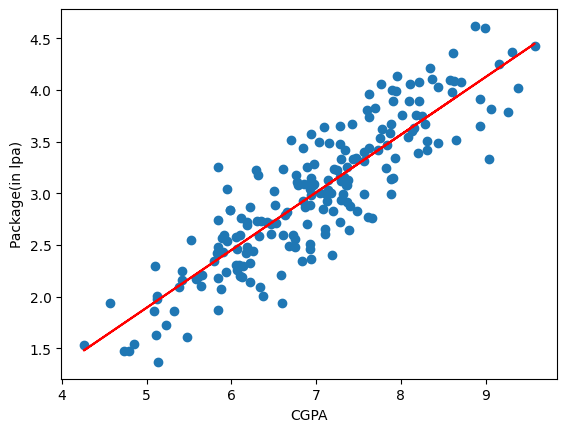

In [33]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
y_pred = lr.predict(x_test)

In [36]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [37]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.2884710931878175


In [38]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.12129235313495527


In [39]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.34827051717731616


In [40]:
print("MSE:", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

MSE: 0.780730147510384


In [41]:
# Adjusted R2 score
x_test.shape

(40, 1)

In [42]:
1 - ((1 - r2)*(40 - 1)/(40 - 1 - 1))

0.7749598882343415

In [43]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.313536,3.26
1,5.12,0.290205,1.98
2,7.82,0.946503,3.25
3,7.42,0.843339,3.67
4,6.94,0.375663,3.57


Text(0, 0.5, 'Package(in lpa)')

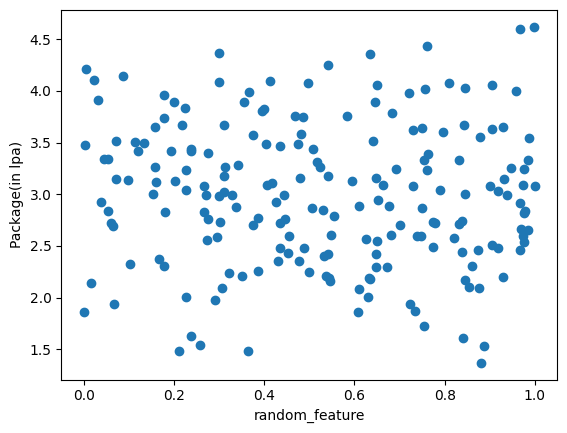

In [44]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [45]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)

In [50]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7762645345487009


In [51]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7641707256053875

In [52]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [53]:
new_df2.sample(5)

,cgpa,iq,package
64,7.36,3.82,2.92
118,7.40,3.48,2.88
122,5.12,0.91,2.01
79,7.18,4.10,3.00
120,5.23,1.73,1.73


Text(0, 0.5, 'Package(in lpa)')

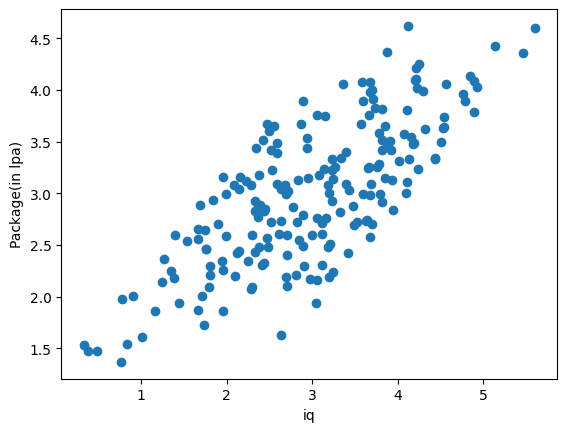

In [54]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [55]:
np.random.randint(-100,100)

1

In [56]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [59]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8404902293716081


In [60]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8318680796079112